<a href="https://colab.research.google.com/github/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/inverseProblems/expectationMaximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging
### David J. Brady
### University of Arizona

### Expectation maximization


This notebook is a copy of the image deconvolution example from Sci-kit Image, down loaded from https://scikit-image.org/docs/dev/auto_examples/filters/plot_deconvolution.html 

## Libraries

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, convolve
from skimage import color, data, restoration, exposure
from skimage import io
from google.colab import files
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 16})


# Image Deconvolution
In this example, we deconvolve an image using Richardson-Lucy
deconvolution algorithm ([1]_, [2]_).

The algorithm is based on a PSF (Point Spread Function),
where PSF is described as the impulse response of the
optical system. The blurred image is sharpened through a number of
iterations, which needs to be hand-tuned.

.. [1] William Hadley Richardson, "Bayesian-Based Iterative
       Method of Image Restoration",
       J. Opt. Soc. Am. A 27, 1593-1607 (1972), :DOI:`10.1364/JOSA.62.000055`

.. [2] https://en.wikipedia.org/wiki/Richardson%E2%80%93Lucy_deconvolution


In [14]:
!wget --no-check-certificate --content-disposition 'https://github.com/djbradyAtOpticalSciencesArizona/computationalImaging/raw/master/images/snake.npy'

--2021-07-29 22:49:10--  https://github.com/djbradyAtOpticalSciencesArizona/computationalImaging/raw/master/images/snake.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/djbradyAtOpticalSciencesArizona/computationalImaging/master/images/snake.npy [following]
--2021-07-29 22:49:10--  https://raw.githubusercontent.com/djbradyAtOpticalSciencesArizona/computationalImaging/master/images/snake.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8388736 (8.0M) [application/octet-stream]
Saving to: ‘snake.npy’

snake.npy           100%[===================>]   8.00M  34.2MB/s    in 0.2s    

2021-07-2

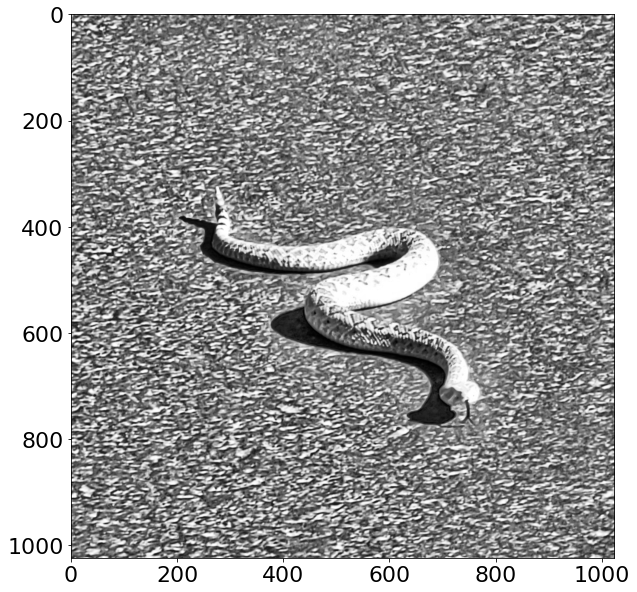

In [19]:
snake=np.load('snake.npy')
snake=exposure.equalize_adapthist(snake)
plt.imshow(snake,cmap='gray')

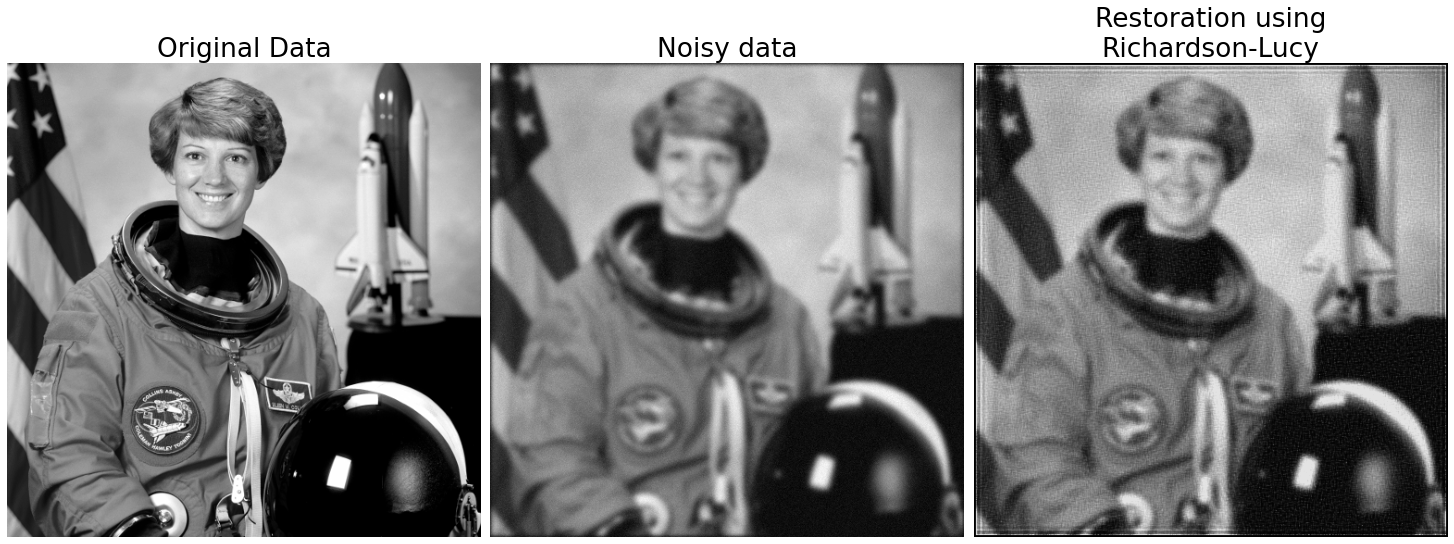

In [27]:


rng = np.random.default_rng()

astroO = color.rgb2gray(data.astronaut())

psf = np.ones((5, 5)) / 25
astro = convolve2d(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (rng.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

fig, ax = plt.subplots(nrows=1, ncols=3)
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astroO)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

Let compare EM deconvolution with Weiner Deconvolution assuming a gaussian PSF

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

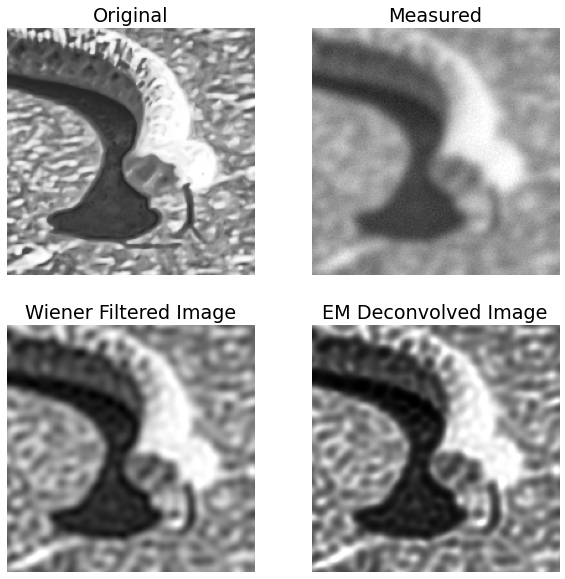

In [39]:
# convolve with sampling psf
snr=10
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf=psf/np.sum(np.sum(psf))
snaked = convolve2d(snake, psf, 'same')
#add noise
snaked += snake.std() * np.random.standard_normal(snake.shape)/snr

deconvolved = restoration.wiener(snaked, psf,1/snr)
deconvolvedRL=restoration.richardson_lucy(snaked, psf, iterations=100)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                       sharex=True, sharey=True)

plt.gray()

ax[0,0].imshow(snake[600:800,600:800], vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0,0].axis('off')
ax[0,0].set_title('Original')
ax[0,1].imshow(snaked[600:800,600:800], vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0,1].axis('off')
ax[0,1].set_title('Measured')
ax[1,0].imshow(deconvolved[600:800,600:800])
ax[1,0].axis('off')
ax[1,0].set_title('Wiener Filtered Image')
ax[1,1].imshow(deconvolvedRL[600:800,600:800])
ax[1,1].axis('off')
ax[1,1].set_title('EM Deconvolved Image')
plt.savefig('snakeEM.pdf')
files.download('snakeEM.pdf')


In [32]:
snaked.shape

(1024, 1024)